# Machine Learning Linear Regression

This notebook covers a Python solution to the liner regression programming exercise in Andrew Ng's machine learning course.

The notebook provides a simple linear regression using gradient descent and applies it to an example problem. Finally the implementation will be extended to handle multiple variables.

## Linear regression with one variable

"This exercise, you will implement linear regresion with one varibale to prodict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
  You would like to use this data to help you select which city to expand to next."
  
We'll start by importing some libraries and examining the data.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
path = os.getcwd() + '/data/linear_regression1.txt'
data = pd.read_csv(path, header=None, names =['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Plotting the data
Before starting the task, it is useful to understand the data by visualising it. For this dataset, we will use a scatter plot to visualise the data, since it has only two properties to plot (profit and population).

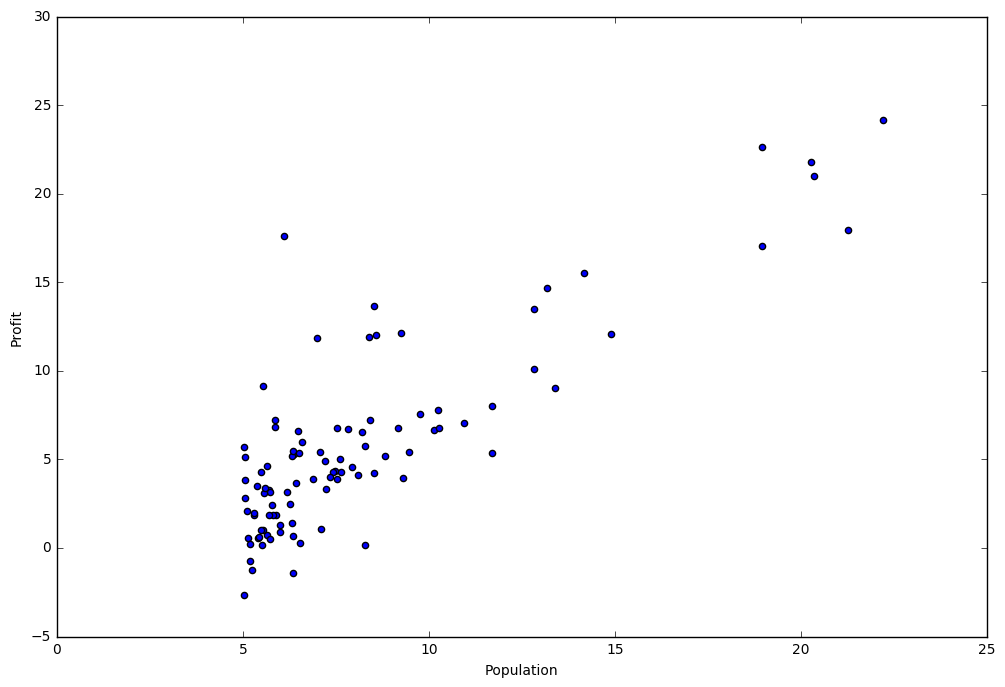

In [8]:
data.plot(kind = 'scatter', x = 'Population', y = 'Profit', figsize=(12,8))

### Gradient Descent
We will now fit the linear regression parameters, theta, to our dataset using gradient descent.

#### Update Equations
The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2$$

where the hypothesis is given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

One way to minimise the cost function is to use the batch gradient descent algorithm. In batch gradient desent, each iteration performs the update

$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum\limits_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$

With each step of gradient descent, the parameters come closer to the optimal values that will achieve the lowest cost.

First we create a function to compute the cost of given solution (characterised by the parameters theta)

In [9]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Now adding a column of ones to the training set so we can use a vectorised solutionto compting cost and gradients

In [10]:
data.insert(0, 'Ones', 1)

Now some variable initialisation

In [16]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

Now x is the training set and y is the target variable. The cost function is expecting numpy matrices so X and y need to be converted before they can be used. Theta also needs to be initialised

In [17]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

Just check the shapes of our matrices

In [18]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

The data is now set up. Now we need to define a function to perform gradient descent on the parameters.

In [21]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

Set the learning rate and the number of interations to perform

In [22]:
alpha = 0.01
iters = 1000

Now we are in a position to run the gradient descent algorithm

In [24]:
g, cost = gradientDescent(X, y, theta, alpha, iters)

Finally the paramter values and the cost

In [25]:
g, computeCost(X, y, g)

(matrix([[-3.24140214,  1.1272942 ]]), 4.5159555030789118)

#### Visualisation
Now we will plot the linear model along with the data to see how it fits. We will also plot the cost at each training iteration. The cost will always decrease as this is a convex optimization problem

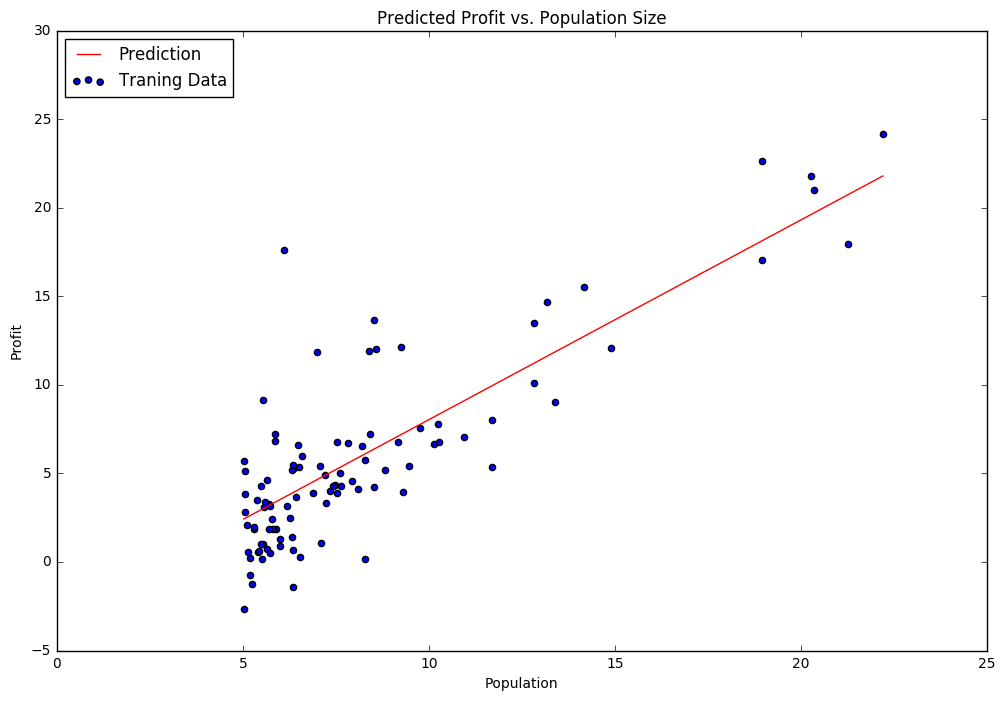

In [26]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

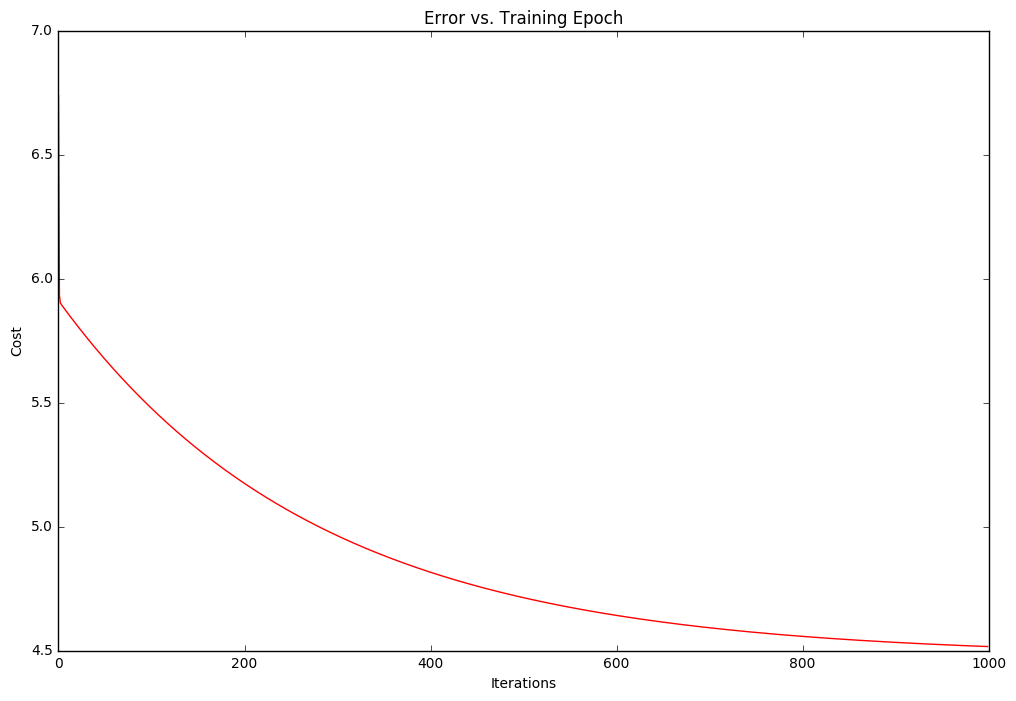

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Linear Regression wiht multiple variables
Now we will do linear regression on a housing price data set with 2 variables